# Deep Learning Fundamentals<br />
<h2><p style="color:darkred">2 - Machine learning with scikit-learn</p></h2>

### Code repeatability
In scientific computing, controlling the state of the PRNG is essential to obtain code which is easily <em>repeatable</em>, and hence easy to debug and/or reproduce.

In [1]:
# The following snippet can be used to initialize the PRNG 
# with a specific seed:
import numpy as np
import random
random.seed(5)
np.random.seed(5)
print(np.random.rand())

0.22199317108973948


<center><img src="Images/supervised-workflow-machine-learning.png">
<a href="http://blog.bidmotion.com/2016/06/23/good-morning-have-you-used-machine-learning/">Image source</a></center>

<p>Let us download the sample data: <a href="https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients">
Default of credit card clients Data Set</a></p>
<br />
<div class="alert alert-success">
<p>Take a look at the <a href="https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset">Kaggle challenge</a> to find some further ideas on the dataset!</p>
</div>

We want to understand the default probability of a client (Yes = 1, No = 0), given:

<ol>
<li><strong>X1</strong>: Amount of the given credit (NT dollars): it includes both the individual consumer credit and his/her family (supplementary) credit.</li>
<li><strong>X2</strong>: Gender (1 = male; 2 = female). 
<li><strong>X3</strong>: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others, 5 = unknown, 6 = unknown).</li>
<li><strong>X4</strong>: Marital status (1 = married; 2 = single; 3 = others).</li>
<li><strong>X5</strong>: Age (year).</li>
<li><strong>X6 - X11</strong>: History of past payment (X6 = repayment status in September, 2005; X7 = the repayment status in August, 2005, ...) The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. </li>
<li><strong>X12-X17</strong>: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. </li>
<li><strong>X18-X23</strong>: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. </li>
</ol>

## Step 1 - Data loading and preprocessing

Let us start by loading the data:

In [4]:
import scipy.io
data = scipy.io.loadmat('./Data/credit_card_data.mat')
X = data['X']
y = data['y']
%whos

Variable   Type       Data/Info
-------------------------------
X          ndarray    30000x23: 690000 elems, type `float64`, 5520000 bytes (5.2642822265625 Mb)
data       dict       n=5
np         module     <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
random     module     <module 'random' from 'C:<...>aconda3\\lib\\random.py'>
scipy      module     <module 'scipy' from 'C:\<...>ges\\scipy\\__init__.py'>
y          ndarray    30000x1: 30000 elems, type `float64`, 240000 bytes (234.375 kb)


In [5]:
# Play with X / y to understand the content!

We can describe the dataset using the <code>describe</code> function from <code>scipy.stats</code> and Pandas:

In [6]:
import scipy.stats
import pandas as pd
pd.DataFrame(X).describe()
pd.DataFrame(y).describe()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


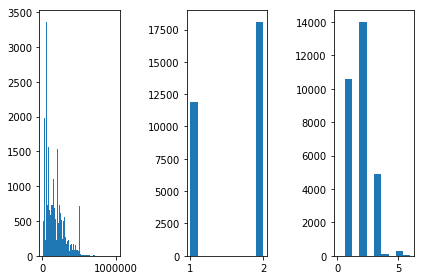

In [7]:
# We should always start by plotting the distribution of our examples

%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 3)

ax[0].hist(X[:, 0], bins=100)  # PLot given credit
ax[1].hist(X[:, 1])           # Gender
ax[2].hist(X[:, 2])           # Education
plt.tight_layout()
plt.show()

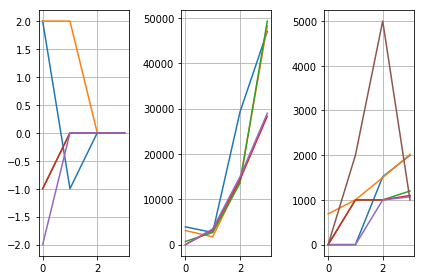

In [8]:
# Some variables in our dataset have a temporal aspect, 
# that we can visualize for a few selected clients
fig, ax = plt.subplots(1, 3)

ax[0].plot(X[0:4, 5:10])  # PLot past payments status
ax[0].grid()
ax[1].plot(X[0:4, 11:16]) # Plot bill statements
ax[1].grid()
ax[2].plot(X[0:4, 17:23]) # Plot amount of previous payments
ax[2].grid()
plt.tight_layout()
plt.show()

A little bit of terminology:
<ol>
<li>The matrices (X, y) are called the <strong>dataset</strong> for our problem.</li>
<li>One row of (X, y) is called an <strong>example</strong>.</li>
<li>Each item in X is a <strong>feature</strong>: a single element characterizing an example.</li>
<li>Each item in y is called a <strong>label</strong>, characterizing the class to which an example belongs to.</li>
</ol>

Our task: learn to categorize elements described by the same features, which <strong>we do not yet know</strong>!

### sklearn interface
<p>The interface of sklearn is composed of a few generic functions, working in the same way for all possible objects:</p>
<ul>
<li><strong>fit</strong>: adapt the object based on some training data.</li>
<li><strong>transform</strong>: apply the trained object on new data (can also use <strong>predict</strong> for supervised models).</li>
<li><strong>score</strong>: apply a predefined scoring function to evaluate the model.
</ul>
<p>Any parameter is provided in the constructor of the object, in most cases via name/value pairs. In this way, the interface of the base functions is extremely compact.</p>

## Step 1 in preprocessing: missing values
A common problem during preprocessing is handling missing values. A simple strategy is to replace them with the average (or median) over the corresponding column:

In [9]:
# We do this for "NaN"
from sklearn import preprocessing
inputer = preprocessing.Imputer(strategy="median", verbose=2)
X = inputer.fit_transform(X)
print(inputer.statistics_)

[1.40000e+05 2.00000e+00 2.00000e+00 2.00000e+00 3.40000e+01 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 2.23815e+04
 2.12000e+04 2.00885e+04 1.90520e+04 1.81045e+04 1.70710e+04 2.10000e+03
 2.00900e+03 1.80000e+03 1.50000e+03 1.50000e+03 1.50000e+03]


## Step 2 in preprocessing: categorical variables
<p>Consider column 3 (marital status). The distance between "married" and "single" is 1, but the distance between "others" and "single" is 2!</p>
<br />
<div class="alert alert-warning">
<p>We are imposing a <em>metric space</em> on categorical data, which is generally confusing for learning algorithms.</p>
</div>

<p>Now consider the transformation single $= [1, 0, 0]$, married $ = [0, 1, 0]$ and others $ = [0, 0 ,1]$. Now all pairwise distances are either $0$ or $\sqrt{2}$. This is called <strong>one-hot encoding</strong>.

In [11]:
from sklearn import preprocessing
X_pre = preprocessing.OneHotEncoder(categorical_features = (1,2,3), sparse=False).fit_transform(X)
pd.DataFrame(X_pre).describe()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,0.396267,0.603733,0.000467,0.352833,0.467667,0.163900,0.004100,0.009333,0.001700,0.001800,...,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,0.489129,0.489129,0.021598,0.477859,0.498962,0.370191,0.063901,0.096159,0.041197,0.042389,...,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


<p>Our features have very different scales, e.g. [0,1] for the categorical features, and [0, 528666] for the last column (amount of previous payments in April 2005). Let us consider a prototypical male user with last column = 10000.</p>

<ul>
<li>Switching the sex from male to female: distance from old pattern is $\sqrt{2}$.</li>
<li>A $1\%$ change in the last column: distance from old pattern is now $\sqrt{500}$!</li>
</ul>

<p>The process of making all features similar is called <strong>feature normalization</strong>. Consider a generic value $X_{i,j}$ of the input matrix, and denote by $X_{\text{min}}$ and $X_{\text{max}}$ the minimum and maximum values computed over the corresponding column. Classical feature scaling in [0,1] is obtained as:</p>

\begin{equation}
X_{i,j} = \frac{X_{i,j} - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
\end{equation}

In [12]:
import sklearn.preprocessing
scaler = sklearn.preprocessing.MinMaxScaler()
X_norm = scaler.fit_transform(X_pre)
pd.DataFrame(X_norm).describe()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.396267,0.603733,0.000467,0.352833,0.467667,0.163900,0.004100,0.009333,0.001700,0.001800,...,0.112157,0.200891,0.120620,0.290851,0.006483,0.003516,0.005832,0.007771,0.011252,0.009865
std,0.489129,0.489129,0.021598,0.477859,0.498962,0.370191,0.063901,0.096159,0.041197,0.042389,...,0.038076,0.060601,0.060284,0.045766,0.018961,0.013680,0.019650,0.025227,0.035820,0.033627
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.087808,0.162330,0.082396,0.261944,0.001145,0.000495,0.000435,0.000477,0.000592,0.000223
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.097374,0.178084,0.098600,0.274097,0.002404,0.001193,0.002009,0.002415,0.003517,0.002837
75%,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.119378,0.211482,0.130415,0.298787,0.005731,0.002969,0.005028,0.006463,0.009452,0.007566
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Another way of normalizing is <strong>standard scaling</strong>. Given the estimated mean $\mu$ and variance $\sigma^2$ for a column we process the values as:

\begin{equation}
X_{i,j} = \frac{X_{i,j} - \mu}{\sigma^2}
\end{equation}

<p>A third type of scaling implemented in scikit-learn is a robust scaling (mostly to outliers), where we substract the mean and scale according to a given range:</p>

In [13]:
import sklearn.preprocessing
scaler = sklearn.preprocessing.RobustScaler() # Default to the interquantile range
#scaler = sklearn.preprocessing.RobustScaler(quantile_range=(0.01, 0.99)) # Select a custom range
X_norm = scaler.fit_transform(X_pre) 
# X_norm = scaler.
pd.DataFrame(X_norm).describe()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.396267,-0.396267,0.000467,0.352833,0.467667,0.163900,0.004100,0.009333,0.001700,0.001800,...,0.468267,0.463996,0.458560,0.454730,0.889561,0.938844,0.832486,0.894768,0.873085,0.957049
std,0.489129,0.489129,0.021598,0.477859,0.498962,0.370191,0.063901,0.096159,0.041197,0.042389,...,1.206108,1.232920,1.255426,1.242205,4.134618,5.529367,4.278727,4.214449,4.042949,4.579166
min,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-3.084472,-3.623126,-2.053348,-7.439659,-0.524214,-0.482121,-0.437424,-0.403524,-0.396930,-0.386374
25%,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.303004,-0.320535,-0.337443,-0.329876,-0.274588,-0.282217,-0.342649,-0.323895,-0.330114,-0.356044
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.696996,0.679465,0.662557,0.670124,0.725412,0.717783,0.657351,0.676105,0.669886,0.643956
max,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,28.592059,16.721858,18.771700,19.702726,217.536695,403.707703,217.312272,166.655458,112.471289,135.788782


## Step 2 - Model training and fine-tuning

Consider a model that predicts the true class for the elements in the training set, 0 otherwise. This has excellent <strong>training performance</strong>, but it doesn't <strong>generalize</strong>.

This is called <strong>overfitting</strong>.

In order to detect overfitting, we can keep a small percentage of the data for test purposes (<strong>holdout</strong> method):

In [14]:
from sklearn import model_selection
X_norm = preprocessing.MinMaxScaler().fit_transform(X_pre)
(X_trn, X_tst, y_trn, y_tst) = model_selection.train_test_split(X_norm, y, test_size=0.25)
print('We now have', 
      X_trn.shape[0], 'elements for training and', X_tst.shape[0], 'for test.')

We now have 22500 elements for training and 7500 for test.


Let us look at the proportions of labels:

In [15]:
print(np.mean(y_trn)*100, '% /', np.mean(y_tst)*100, '%')

21.92 % / 22.720000000000002 %


<p>The distribution is not perfectly equivalent between the two sets. We can do better with a <strong>stratified</strong> holdout:</p>

In [16]:
from sklearn import model_selection
(X_trn, X_tst, y_trn, y_tst) = model_selection.train_test_split(X_norm, y, test_size=0.25, stratify=y)
print(np.mean(y_trn)*100, '% /', np.mean(y_tst)*100, '%')

22.12 % / 22.12 %


<p>We need a <strong>baseline</strong> accuracy to start our investigation. The <code>DummyClassifier</code> will output <em>constant</em> predictions with the most frequent item in the training set (note that we need to encode also the output using a one-hot-encoding for the method to work):</p>

In [17]:
y_trn_dummy = preprocessing.OneHotEncoder(sparse=False).fit_transform(y_trn).astype(int)
y_tst_dummy = preprocessing.OneHotEncoder(sparse=False).fit_transform(y_tst).astype(int)

from sklearn import dummy
d = dummy.DummyClassifier(strategy='most_frequent').fit(X_trn, y_trn_dummy)
d.score(X_tst, y_tst_dummy) # Returns binary classification accuracy

0.7788

<div class="alert alert-success">
<p>An accuracy is always "good" compared to some alternative. Any model performing with an accuracy lower than $77.88\%$ is basically useless in this scenario. At the same time, maybe even a $1\%$ improvement is very significant here!</p>
</div>

<center><h2>How do we choose a proper classifier now?</h2></center>
<center><img src="./Images/ml_map.png"  /></center>

## Logistic regression
Let us start with the simplest one! A linear model is defined as:

$$
f(\mathbf{x}) = \mathbf{w}^T\mathbf{x} + b
$$

The vector $\mathbf{w}$ and scalar $b$ are called <strong>parameters</strong> of the model, and should be chosen based on the training data.

With a linear model, the output can be boundless, while we prefer to have a probability that the input belongs to a given class. We can achieve this using a nonlinear transformation:

$$
f(\mathbf{x}) = \frac{1}{1+\exp\left\{-\mathbf{w}^T\mathbf{x}-b\right\}}
$$

The nonlinear transformation ensures that the output is a correct probability in [0,1].

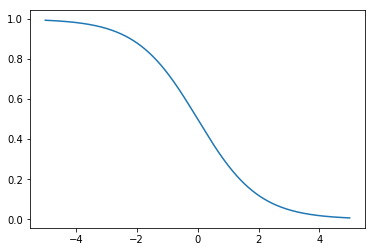

In [22]:
import matplotlib.pyplot as plt
x_range = np.arange(-5.0, 5.0, 0.01)
plt.plot(x_range, 1/(1+np.exp(x_range)))
plt.show()

Finding the optimal parameters is done by minimizing some <strong>error</strong> (<strong>loss</strong>) on our dataset. In the case of logistic regression, it is cross-entropy:

$$
J(w, b) = - \sum_{i=1}^N y_i \log\left\{f(x_i)\right\} + (1-y_i)\log\left\{1 - f(x_i)\right\}
$$

## Understanding cross-entropy
<br /><br />
<center><img src="./Images/CrossEntropyDef.png"  /></center>

http://colah.github.io/posts/2015-09-Visual-Information/

In [23]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression()
logreg.fit(X_trn, y_trn)
print(logreg.score(X_tst, y_tst))

In [24]:
# Play around with the regularization factor C!

This <strong>regularization factor</strong> expresses a preference for solutions with small weights. It is another way to prevent overfitting.

However, this parameter needs to be chosen by the user: in statistical terminology, it is called an <strong>hyper-parameter</strong>.

<p>How do we choose a proper regularization factor $C$? We can do the same as for testing:</p>

<ol>
<li>Split our training data in two, and use one part for training and one part for evaluating performance.</li>
<li>Train and evaluate several models with different parameters.</li>
<li>Select the parameter giving rise to the highest accuracy, retrain the final model with that parameter and the full training set.</li>
</ol>

<p>This is called <strong>grid search</strong>. A better way to evaluate the classifier is $k$-fold cross-validation (next), which can be used also for testing. We now have:</p>

<ul>
<li><strong>Training set</strong> used for training.</li>
<li><strong>Validation set </strong> used for selecting <em>hyper-parameters</em> (like $C$).</li>
<li><strong>Test set</strong> to evaluate the final performance.</li>
</ul>

<center><img src="./Images/07_cross_validation_diagram.png" />
<a href="http://blog.kaggle.com/2015/06/29/scikit-learn-video-7-optimizing-your-model-with-cross-validation/">Image source</a></center>

<center><img src="./Images/nested-k-fold.png" />
<a href="http://sebastianraschka.com/faq/docs/evaluate-a-model.html">Image source</a></center>

For parameters like $C$, it makes more sense to search them in an exponential range, like:

$$
2^{-10}, \ldots, 2^{-9}, \ldots, 2^{9}, 2^{10} \,.
$$

<p>This is because a small change (e.g., $105$ instead of $100$) might not influence the result if we are not close to the optimal point, and a very fine-grained research is too time consuming.</p>

Eventually, a second fine-tuning can be made around the optimal coefficient:
<pre>Hsu, C.W., Chang, C.C. and Lin, C.J., 2003. A practical guide to support vector classification.</pre>

In [ ]:
# Note that in logistic regression for sklearn, C is the inverse of the regularization strength.

# The dictionary has the parameters we want to test, and their respective values
d = {'C': 2.0**np.arange(-10, 10, 1)}

# A grid-search is defined with a model and the dictionary of parameters
logreg_cv = sklearn.model_selection.GridSearchCV(logreg, d, verbose=1) # Default is a 3-fold cross-validation

# We can fit it equivalently to a standard model
logreg_cv.fit(X_trn, y_trn)
print('Accuracy: ', logreg_cv.score(X_tst, y_tst)*100, ' %.')

In [ ]:
import matplotlib.pyplot as plt

# Very small C: regularization is too large, all coefficients become 0
# Very large C: the accuracy reaches a plateau, there appear to be no overfitting in this case

plt.figure()
plt.grid()
plt.plot(d['C'], logreg_cv.cv_results_['mean_test_score'])
plt.xlabel('C')
plt.ylabel('Cross-validated accuracy')
plt.xscale('log')

In [ ]:
# We can also plot the resulting best parameter found by the grid-search procedure
print(logreg_cv.best_params_)

## Final bits of theory!

How do you solve the optimization problem? The simplest idea is to use <strong>gradient descent</strong>, an iterative procedure:

$$
w = w - \alpha \nabla J(w)
$$

(sklearn solves the problem with a more advanced optimization technique, but GD is the basis for most optimization in more complex models, such as deep learning models).

### Stochastic optimization

For very big datasets, we cannot compute the gradient for the entire dataset. In this case, we can compute each step with a small sample of the entire training dataset.

This is called <strong>stochastic</strong> gradient descent (SGD).

In [ ]:
sgd = linear_model.SGDClassifier(loss='hinge', penalty='l2', n_iter=100)  # This is a linear SVM
sgd.fit(X_trn, y_trn).score(X_tst, y_tst)

In [ ]:
sgd = linear_model.SGDClassifier(loss='huber', penalty='l2', n_iter=100)  # Robust regression
sgd.fit(X_trn, y_trn).score(X_tst, y_tst)

## The steps up to now
Let us summarize the main steps of a supervised learning workflow up to now:
<ol>
<li>Problem definition and data collection.</li>
<li><strong>Data preprocessing</strong>: at least data normalization, one-hot-encoding when needed, and missing data removal / imputation. Later on, we will add feature selection, feature transformation, and column normalization.</li>
<li><strong>Model selection</strong>: there are many families of classifiers, a brief overview is given next.</li>
<li><strong>Data splitting, model training, and model fine-tuning</strong>.</li>
<li><strong>Model evaluation</strong> (more later on), and final deploy.</li>
</ol>

## Choosing a classifier

<p>In machine learning, there are hundreds of possible classifiers, organized in different "families" of methods, each with their own strengths and weaknesses in terms of several factors, e.g.:</p>

<pre>Fernández-Delgado, M., Cernadas, E., Barro, S. and Amorim, D., 2014. Do we need hundreds of classifiers to solve real world classification problems?. J. Mach. Learn. Res, 15(1), pp. 3133-3181.</pre>

<p>We will briefly review some of the most important implemented in scikit-learn. Remember that, in many cases, the actual bottleneck can be another, e.g. availability of data, feature extraction, and so on.</p>

<div class="alert alert-success">
<a href="http://scikit-learn.org/stable/modules/classes.html">Read more on each family in the user guides of scikit-learn!</a>

## Choosing a model: the trade-offs
<p>Accuracy is not the only element to consider when choosing the 'correct' classification model. Each algorithm provides a different trade-off along a multidimensional set of parameters, among which:</p>
<ol>
<li><strong>Complexity</strong>: some algorithms can model highly nonlinear functions, while others (e.g., linear) are much simpler.</li>
<li><strong>Speed of learning</strong> and <strong>speed of classification</strong>.</li>
<li><strong>Robustness</strong> to irrelevant attributes, missing values, noise.</li>
<li><strong>Transparency</strong> of the decisions.</li>
<li>...</li>
</ol>

<center><img src="./Images/Classifiers_comparison.png"  /></center>
<p>Taken from: Kotsiantis, S.B., 2007. <strong>Supervised machine learning: a review of classification techniques</strong>. <em>Informatica</em>, 31(3), pp.249-269.</p>

### k-Nearest Neighbors
<p>The KNN simply predicts a class according to the most similar items in the training set.</p>

<font color="green">Pros</font>
<ol>
<li>No training required.</li>
<li>Can be re-implemented immediately.</li>
<li>Highly nonlinear decision function.</li>
</ol>

<font color="red">Cons</font>
<ol>
<li>Needs to store the entire training dataset.</li>
<li>Performs poorly with many features, due to the curse of dimensionality.</li>
</ol>

<center><img src="./Images/KnnClassification.svg.png" />
<a href="https://commons.wikimedia.org/wiki/File:KnnClassification.svg ">Image source</a></center>

<center><img src="./Images/Curse_of_dimensionality.png" />

In [26]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier().fit(X_trn, y_trn)
print('Accuracy: ', knn.score(X_tst, y_tst)*100, ' %.') # Most of the time is now spent in evaluating the classifier!

C:\Users\ISPAMM\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Accuracy:  79.17333333333333  %.


### Support vector machine
<strong>Support vector machines</strong> (SVMs) builds a linear classifier on a new space $\phi(\boldsymbol{x})$ defined <em>implicitly</em> by a kernel function:

\begin{equation}
k(\boldsymbol{x}_1, \boldsymbol{x}_2) = \phi(\boldsymbol{x}_1)^T\phi(\boldsymbol{x}_2)
\end{equation}

<font color="green">Pros</font>
<ol>
<li>State-of-the-art accuracy for medium datasets.</li>
<li>Provable convergence guarantees and many theoretical analyses.</li>
<li>Can use kernels defined on many objects (e.g., graphs).</li>
<li>Random approximations for use in large-scale datasets.</li>
</ol>

<font color="red">Cons</font>
<ol>
<li>No immediate interpretation.</li>
<li>For most non-linear kernels, we need to select additional hyper-parameters.</li>
<li>Storage requirements linear (approximately) with the size of the training set.</li>
</ol>

In [27]:
import sklearn.svm
svm = sklearn.svm.SVC(kernel='rbf', gamma=1)
svm.fit(X_trn, y_trn)
print('Accuracy: ', svm.score(X_tst, y_tst)*100, ' %.')

C:\Users\ISPAMM\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  80.92  %.


### Decision Trees

A decision tree represents the relation as a directed tree in which at every node we test the value of a feature for selecting the branch to follow.

<font color="green">Pro</font>
<ol>
<li>Can be interpreted by the user.</li>
<li>Can associate an 'importance' to each feature.</li>
</ol>

<font color="red">Cons</font>
<ol>
<li>Accuracy might not be optimal.</li>
<li>The construction process is heavily heuristic.</li>
<li>Lots of variance.</li>
</ol>

<center><img src="./Images/tvTree.jpg" />
<a href="http://www.sfs.uni-tuebingen.de/~vhenrich/ss12/java/homework/hw7/decisionTrees.html">Image source</a></center>

In [ ]:
import sklearn.tree
dec_tree = sklearn.tree.DecisionTreeClassifier(max_depth=5, max_features=5)
dec_tree.fit(X_trn, y_trn)
print('Accuracy: ', dec_tree.score(X_tst, y_tst)*100, ' %.')

In [ ]:
print(dec_tree.feature_importances_)

### Neural Networks

Neural networks can model highly nonlinear functions, and they are at the heart of "deep learning".

<font color="green">Pro</font>
<ol>
<li>For high-dimensional data (with enough examples), accuracies are state-of-the-art.</li>
<li>Lot of hype recently, with many dedicated libraries.</li>
</ol>

<font color="red">Cons</font>
<ol>
<li>Many hyper-parameters to tune for large networks.</li>
<li>Nonconvex training problem with many minima and saddle points.</li>
</ol>

<center><img src="./Images/tikz11.png" />
<a href="http://neuralnetworksanddeeplearning.com/chap1.html">Image source</a></center>

C:\Users\ISPAMM\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  81.09333333333333  %.


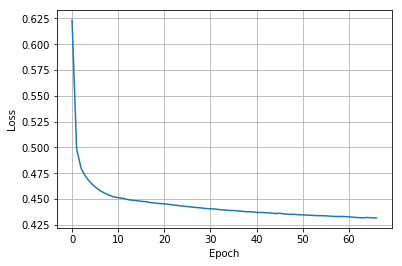

In [29]:
import sklearn.neural_network
nnet = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(20), solver='adam', max_iter=500, batch_size=100)
nnet.fit(X_trn, y_trn)
print('Accuracy: ', nnet.score(X_tst, y_tst)*100, ' %.')
plt.figure()
plt.grid()
plt.plot(nnet.loss_curve_)
plt.xlabel('Epoch')
plt.ylabel('Loss')

## A curiosity: auto machine learning
<p>Recently, there is interest in designing <strong>automatic systems</strong> for supervised learning. One example is the <a href="http://automl.org/" target="_blank">AutoML package</a>, which is a wrapper around scikit-learn.</p>

<center><img src="./Images/AutoML_architecture.png" />
<p>An overview of the AutoML system taken from: Feurer, M., Klein, A., Eggensperger, K., Springenberg, J., Blum, M. and Hutter, F., 2015. <strong>Efficient and robust automated machine learning</strong>. In <em>Advances in Neural Information Processing Systems</em> (pp. 2962-2970).</p>

In [ ]:
# Can only run on Ubuntu for now! :-(

import autosklearn.classification

automl = autosklearn.classification.AutoSklearnClassifier()
automl.fit(X_trn, y_trn)
y_hat = automl.predict(X_tst)

print("Accuracy score", sklearn.metrics.accuracy_score(y_tst, y_hat))

## Unbalanced learning
<p>The dataset we have been using has a strong imbalance between positive and negative examples. One way to correct this is to resample the dataset to obtain balanced classes. Another is to give more weight to the smaller class:</p>

In [ ]:
clf_weights = svm.LinearSVC(class_weight='balanced')
clf_weights.fit(X_trn, y_trn, sample_weight=y_trn).score(X_tst, y_tst)

There is an entire scikit-learn contributed module for unbalanced learning: [scikit-learn-contrib/imbalanced-learn](https://github.com/scikit-learn-contrib/imbalanced-learn)

<p>In unbalanced learning, it is especially import to consider metrics more advanced than the simple average accuracy:</p>
<ol>
<li><strong>Precision</strong>: percentage of positive predictions which are correct.</li>
<li><strong>Recall</strong>: percentage of positives correctly predicted by the algorithm.</li>
<li><strong>F1-score</strong>: harmonic mean of the two.</li>
</ol>

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_tst, logreg.predict(X_tst)))
print('Confusion matrix:\n-----------------\n', metrics.confusion_matrix(y_tst, logreg.predict(X_tst)))

Plotting precision and recall for different roundings of the classifier predictions gives us the precision-recall curve:

In [ ]:
precision, recall, _ = metrics.precision_recall_curve(y_tst, logreg.decision_function(X_tst))
plt.plot(recall, precision, color='navy',
         label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
precision

## Advanced profiling
<p>When computational considerations are especially important, we can use an advanced profiler for our code, such as <a href="https://jiffyclub.github.io/snakeviz/">SnakeViz</a>:</p>

In [ ]:
%load_ext snakeviz
% snakeviz linear_model.RidgeClassifier().fit(X_trn, y_trn)